In [10]:
import numpy as np
import sklearn.decomposition as sk1
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

Task 1:

In [11]:
X_train = np.zeros([15*100, 114])   # initialize X_train

# load train data:

foldername = "hw2data/train/"
filenames = os.listdir(foldername)
filenames.sort()

for i in range(len(filenames)):
    path = foldername + filenames[i]
    data = np.load(path)
    X_train[i*100:(i+1)*100] = data.T

In [12]:
# Center the data in X_train:

scaler = StandardScaler()
scaler.fit(X_train)
X_train_centered = scaler.transform(X_train)

In [13]:
E_114 = np.linalg.norm(X_train_centered)    # amount of energy when we don't truncate, i.e. all modes used

E_pcts = np.zeros(114)

for n in range(1, 115):
    pca = sk1.PCA(n)
    pca.fit(X_train_centered)
    Xn = pca.transform(X_train_centered)
    Xn_inv = pca.inverse_transform(Xn)
    E_n = np.linalg.norm(Xn_inv)
    pct_E = E_n/E_114
    E_pcts[n-1] = pct_E

In [14]:
m_70 = 0    # initialize these variables
m_80 = 0
m_90 = 0
m_95 = 0

for j in range(114):
    if E_pcts[j]>= 0.7:
        m_70 = j + 1    # how many PCA spatial modes you need to keep 70% of the energy
                        # i.e., to approximate X_train to 70%
        break

for j in range(114):
    if E_pcts[j] >= 0.8:
        m_80 = j + 1
        break

for j in range(114):
    if E_pcts[j] >= 0.9:
        m_90 = j + 1
        break

for j in range(114):
    if E_pcts[j] >= 0.95:
        m_95 = j + 1
        break

In [15]:
print("# of PCA spatial modes to approx. X_train to at least 70%:", m_70)
print("# of PCA spatial modes to approx. X_train to at least 80%:", m_80)
print("# of PCA spatial modes to approx. X_train to at least 90%:", m_90)
print("# of PCA spatial modes to approx. X_train to at least 96%:", m_95)

# of PCA spatial modes to approx. X_train to at least 70%: 2
# of PCA spatial modes to approx. X_train to at least 80%: 3
# of PCA spatial modes to approx. X_train to at least 90%: 5
# of PCA spatial modes to approx. X_train to at least 96%: 7


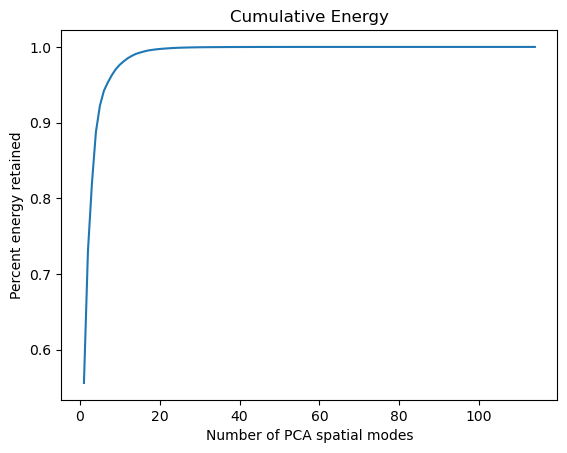

In [16]:
# Cumulative Energy Plot:

plt.plot(np.arange(1,115), E_pcts)
plt.xlabel('Number of PCA spatial modes')
plt.ylabel('Percent energy retained')
plt.title("Cumulative Energy")
plt.savefig("AMATH482_HW2_fig1.png")

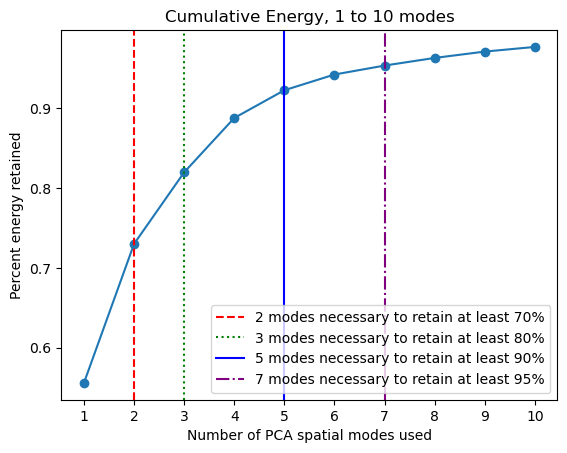

In [50]:
# Cumulative Energy Plot, Zoomed in on the first 10 modes:

plt.plot(np.arange(1,11), E_pcts[:10])
plt.scatter(np.arange(1,11), E_pcts[:10])
plt.axvline(x=2, color = 'r', linestyle = '--', label = '2 modes necessary to retain at least 70%')
plt.axvline(x=3, color = 'g', linestyle = ':', label = '3 modes necessary to retain at least 80%')
plt.axvline(x=5, color = 'b', linestyle = '-', label = '5 modes necessary to retain at least 90%')
plt.axvline(x=7, color = 'purple', linestyle = '-.', label = '7 modes necessary to retain at least 95%')
plt.xlabel('Number of PCA spatial modes used')
plt.ylabel('Percent energy retained')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.title("Cumulative Energy, 1 to 10 modes")
plt.legend()
plt.savefig("AMATH482_HW2_fig2.png")

Task 2:

In [18]:
# Truncate PCA modes to 2 modes:
pca = sk1.PCA(2)
pca.fit(X_train_centered)
X2 = pca.transform(X_train_centered)

# Truncate PCA modes to 3 modes:
pca = sk1.PCA(3)
pca.fit(X_train_centered)
X3 = pca.transform(X_train_centered)

print(X2.shape)
print(X3.shape)

(1500, 2)
(1500, 3)


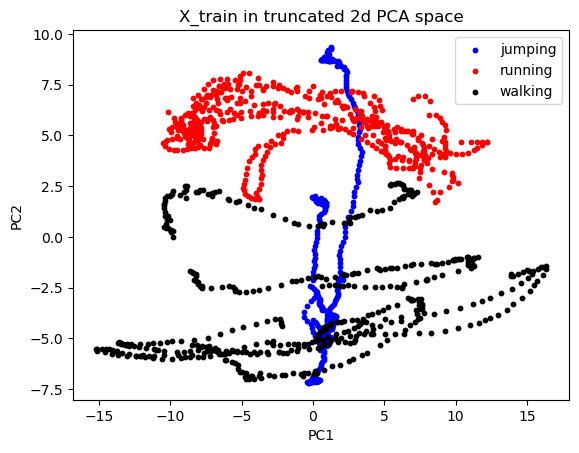

In [19]:
# Plot the projected X_train in the truncated PCA space as low dimensional
# 2d (PC1, PC2 coordinates) trajectories:

plt.scatter(X2[0:500,0], X2[0:500, 1], color='blue', s = 10, label='jumping')
plt.scatter(X2[500:1000,0], X2[500:1000, 1], color='red', s = 10, label='running')
plt.scatter(X2[1000:,0], X2[1000:, 1], color='black', s = 10, label='walking')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("X_train in truncated 2d PCA space")
plt.legend()

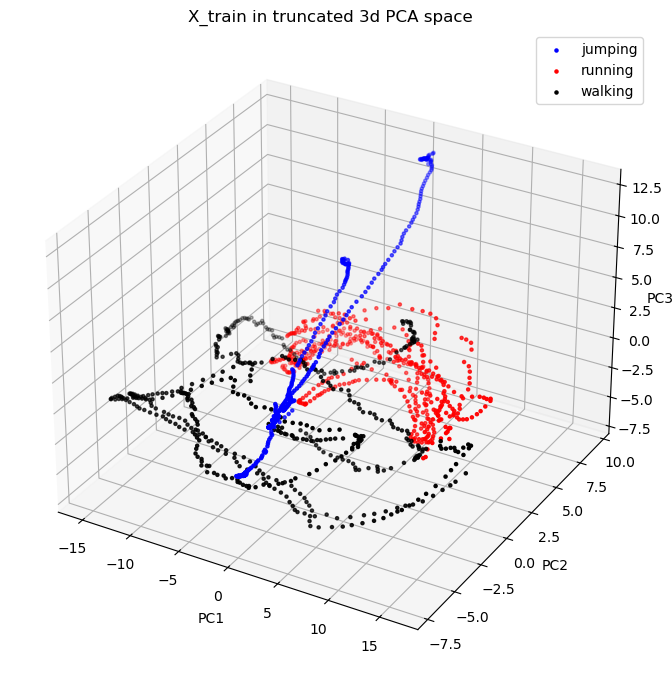

In [20]:
# Plot the projected X_train in the truncated PCA space as low dimensional
# 3d (PC1, PC2, PC3 coordinates) trajectories:

fig = plt.figure(figsize=(4,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3[0:500,0], X3[0:500, 1], X3[0:500, 2], color='blue', s = 5, label='jumping')
ax.scatter(X3[500:1000,0], X3[500:1000, 1], X3[500:1000, 2], color='red', s = 5, label='running')
ax.scatter(X3[1000:,0], X3[1000:, 1], X3[1000:, 2], color='black', s = 5, label='walking')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3', labelpad=-1)
ax.set_title("X_train in truncated 3d PCA space")
plt.legend()
plt.subplots_adjust(left = 0.1, right = 500, bottom = 0.1, top = 0.9)

Task 3:

In [21]:
# Create a vector of Ground Truth Labels:

ground_truth_labels = np.append(np.ones(500), 2*np.ones(500))
ground_truth_labels = np.append(ground_truth_labels, np.zeros(500))

In [22]:
# Create a function which will truncate PCA modes to k modes 
# and give projected X_train in k-modes PCA space:

def PCA_k(data, k):
    pca = sk1.PCA(k)
    pca.fit(data)
    Xk = pca.transform(data)
    return Xk

In [23]:
# Truncate PCA modes to k=3 modes:
Xk = PCA_k(X_train_centered, 3) # Adjust k later once you know more from task 4

# Compute the centroid for each movement in k-modes PCA space:

j_mean = np.mean(Xk[0:500], axis=0)  # mean of jumping, which is a 1 x k vector
r_mean = np.mean(Xk[500:1000], axis=0)  # mean of running, which is a 1 x k vector
w_mean = np.mean(Xk[1000:], axis=0)  # mean of walking, which is a 1 x k vector

# I am choosing to keep 3 modes here. After task 4, I will have a better idea of which k is best to choose.
#Save the centroids:

centroid_j_3 = j_mean
centroid_r_3 = r_mean
centroid_w_3 = w_mean

In [24]:
# Truncate PCA modes to k=2 modes:
Xk = PCA_k(X_train_centered, 2)

# Compute the centroid for each movement in k-modes PCA space:

j_mean = np.mean(Xk[0:500], axis=0)  # mean of jumping, which is a 1 x k vector
r_mean = np.mean(Xk[500:1000], axis=0)  # mean of running, which is a 1 x k vector
w_mean = np.mean(Xk[1000:], axis=0)  # mean of walking, which is a 1 x k vector

# save:

centroid_j_2 = j_mean
centroid_r_2 = r_mean
centroid_w_2 = w_mean

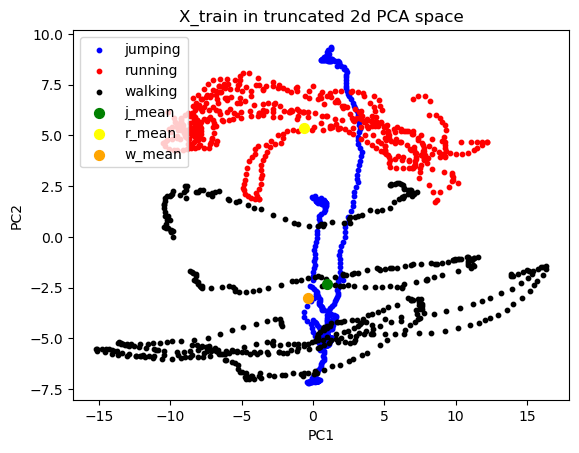

In [25]:
# Re-do plots from task 2 but now with centroids plotted as well:

plt.scatter(X2[0:500,0], X2[0:500, 1], color='blue', s = 10, label='jumping')
plt.scatter(X2[500:1000,0], X2[500:1000, 1], color='red', s = 10, label='running')
plt.scatter(X2[1000:,0], X2[1000:, 1], color='black', s = 10, label='walking')
plt.scatter(centroid_j_2[0], centroid_j_2[1], color='green', s = 50, alpha = 1, label = 'j_mean')
plt.scatter(centroid_r_2[0], centroid_r_2[1], color='yellow', s = 50, alpha = 1, label = 'r_mean')
plt.scatter(centroid_w_2[0], centroid_w_2[1], color='orange', s = 50, alpha = 1, label = 'w_mean')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("X_train in truncated 2d PCA space")
plt.legend(loc='upper left')
plt.savefig("AMATH482_HW2_fig3.png")

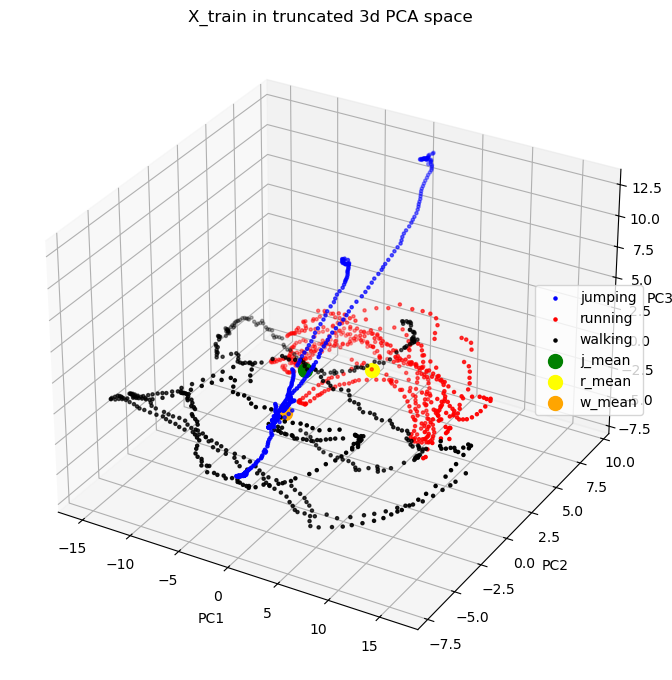

In [49]:
fig = plt.figure(figsize=(4,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3[0:500,0], X3[0:500, 1], X3[0:500, 2], color='blue', s = 5, label='jumping')
ax.scatter(X3[500:1000,0], X3[500:1000, 1], X3[500:1000, 2], color='red', s = 5, label='running')
ax.scatter(X3[1000:,0], X3[1000:, 1], X3[1000:, 2], color='black', s = 5, label='walking')
ax.scatter(centroid_j_3[0], centroid_j_3[1], centroid_j_3[2], color = 'green', s = 100, alpha = 1, label = 'j_mean')
ax.scatter(centroid_r_3[0], centroid_r_3[1], centroid_r_3[2], color='yellow', s = 100, alpha = 1, label = 'r_mean')
ax.scatter(centroid_w_3[0], centroid_w_3[1], centroid_w_3[2], color = 'orange', s= 100, alpha = 1, label = 'w_mean')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3', labelpad=-1)
ax.set_title("X_train in truncated 3d PCA space")
ax.legend(loc='center right')
plt.subplots_adjust(left = 0.1, right = 500, bottom = 0.1, top = 0.9)

Task 4:

In [27]:
# For each sample (1500 of them) in X_train, this function will compute the distance between the 
# projected point in k-modes PCA space and each of the centroids.
# Then it will assign to that sample a category based on which centroid it is closest to:

def trained_labels_k(labels, data, k):
    # Truncate PCA modes to k modes:
    Xk = PCA_k(data, k)

    # Compute the centroid for each movement in k-modes PCA space:
    m = len(data)
    n = int(m/3)

    j_mean = np.mean(Xk[0:n], axis=0)  # mean of jumping, which is a 1 x k vector
    r_mean = np.mean(Xk[n:2*n], axis=0)  # mean of running, which is a 1 x k vector
    w_mean = np.mean(Xk[2*n:], axis=0)  # mean of walking, which is a 1 x k vector

    trained_labels = np.zeros(m)

    for j in range(m):

        # Get projected point of current sample in k-modes PCA space:
        sample_pca = Xk[j]

        # Find distance to centroid for jumping:
        j_dist = np.linalg.norm(sample_pca - j_mean)

        # Find distance to centroid for running:
        r_dist = np.linalg.norm(sample_pca - r_mean)

        # Find distance to centroid for walking:
        w_dist = np.linalg.norm(sample_pca - w_mean)

        min_dist_index = np.argmin([j_dist, r_dist, w_dist])

        if min_dist_index == 0:
            trained_labels[j] = 1

        if min_dist_index == 1:
            trained_labels[j] = 2

        if min_dist_index == 2:
            trained_labels[j] = 0

    accuracy_k = accuracy_score(labels, trained_labels)
    return accuracy_k, trained_labels

In [28]:
# I will find the accuracy of the label classification system for each possible k:

accuracy_k_range = np.zeros(114)    # initialize

for j in range(1, 115):
    accuracy_k, trained_labels = trained_labels_k(ground_truth_labels, X_train_centered, j)
    accuracy_k_range[j-1] = accuracy_k

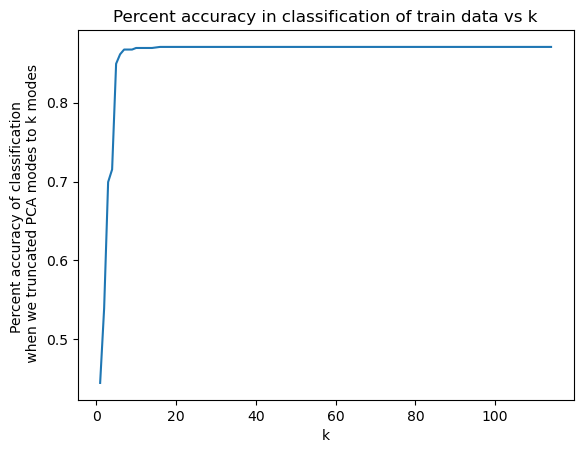

In [29]:
# Plot percent accuracy in classification vs k:

plt.plot(np.arange(1,115), accuracy_k_range)
plt.xlabel('k')
plt.ylabel('Percent accuracy of classification \n when we truncated PCA modes to k modes')
plt.title('Percent accuracy in classification of train data vs k')
plt.savefig("AMATH482_HW2_fig5.png")

In [30]:
# Find the number (k) of modes we need to get 85% accuracy in our classification method:

k_modes_for85 = 0

for j in range(114):
    if accuracy_k_range[j] >= 0.85:
        k_modes_for85 = j + 1
        break

print("min # of modes to get 85 percent accuracy:", k_modes_for85)    # k necessary such that we get at least 85% accuracy in our classification
print("max accuracy:", np.max(accuracy_k_range)) # maximum accuracy we get with this method
# Note that even keeping all modes doesn't classify perfectly accurately.

# accuracy with 1 mode:
print("accuracy with 1 mode:", accuracy_k_range[0])

# Find the number of modes past which we gain no additional accuracy (i.e. first k where our maximal accuracy is attained)
max_index = np.argmax(accuracy_k_range)
print("fewest modes to get maximum accuracy:", max_index)
# thus we only need to keep 15 modes at most: keeping more than 15 doesn't improve accuracy at all.
# However, 15 modes leads to ~87% accuracy, but 6 modes leads to ~85 %. So we can keep less that 15 modes. 6 modes would be adequate.

min # of modes to get 85 percent accuracy: 6
max accuracy: 0.8706666666666667
accuracy with 1 mode: 0.44466666666666665
fewest modes to get maximum accuracy: 15


Task 5:

In [31]:
X_test = np.zeros([3*100, 114])   # initialize X_test

# load test data:

foldername = "hw2data/test/"
filenames = os.listdir(foldername)
filenames.sort()

for i in range(len(filenames)):
    path = foldername + filenames[i]
    data = np.load(path)
    
    X_test[i*100:(i+1)*100] = data.T

ground_truth_labels_test = np.append(np.ones(100), 2*np.ones(100))
ground_truth_labels_test = np.append(ground_truth_labels_test, np.zeros(100))

# Center the data in X_test:

X_test_centered = scaler.transform(X_test)

In [32]:
# define function to compute k pca modes of test data, fitted to train data,
# and then project X_train into k-PCA modes space:

def PCA_k_test(data_train, data_test, k):
    pca = sk1.PCA(k)
    pca.fit(data_train)
    Xk = pca.transform(data_test)
    return Xk

In [33]:
# this function will test our classification system on recognition of new samples (i.e. the test data)

def trained_labels_test(labels_test, data_train, data_test, k):
    # Truncate PCA modes to k modes for both train and test data:
    Xk = PCA_k(data_train, k)
    Xk_test = PCA_k_test(data_train, data_test, k)

    # Compute the centroid for each movement in k-modes PCA space from the train data:
    m = len(data_train)
    n = int(m/3)

    j_mean = np.mean(Xk[0:n], axis=0)  # mean of jumping, which is a 1 x k vector
    r_mean = np.mean(Xk[n:2*n], axis=0)  # mean of running, which is a 1 x k vector
    w_mean = np.mean(Xk[2*n:], axis=0)  # mean of walking, which is a 1 x k vector

    trained_labels_test = np.zeros(len(data_test))

    for j in range(len(data_test)):

        # Get projected point of current sample of test data in k-modes PCA space:
        sample_pca = Xk_test[j]

        # Find distance to centroid for jumping:
        j_dist = np.linalg.norm(sample_pca - j_mean)

        # Find distance to centroid for running:
        r_dist = np.linalg.norm(sample_pca - r_mean)

        # Find distance to centroid for walking:
        w_dist = np.linalg.norm(sample_pca - w_mean)

        min_dist_index = np.argmin([j_dist, r_dist, w_dist])

        if min_dist_index == 0:
            trained_labels_test[j] = 1

        if min_dist_index == 1:
            trained_labels_test[j] = 2

        if min_dist_index == 2:
            trained_labels_test[j] = 0

    accuracy_k = accuracy_score(labels_test, trained_labels_test)
    return accuracy_k, trained_labels_test


In [34]:
# try k = 6:
accuracy_6, trained_labels_6 = trained_labels_test(ground_truth_labels_test, X_train_centered, X_test_centered, 6)
print(accuracy_6)
print(trained_labels_6)

0.46
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [35]:
# I will find the accuracy of the label classification system on the test data for each possible k:

accuracy_k_testrange = np.zeros(114)

for j in range(1, 115):
    accuracy, labels = trained_labels_test(ground_truth_labels_test, X_train_centered, X_test_centered, j)
    accuracy_k_testrange[j-1] = accuracy

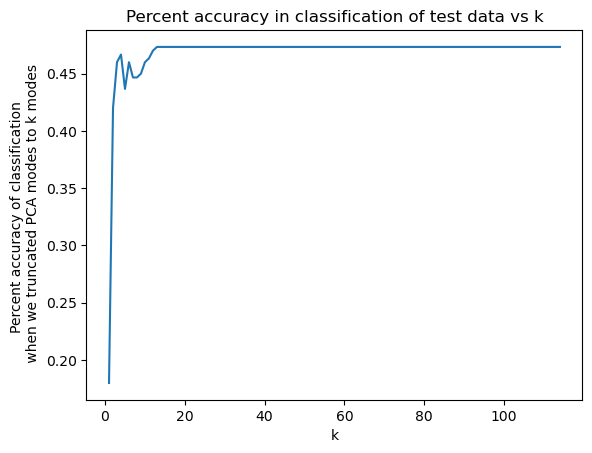

In [36]:
# Plot percent accuracy in classification of test data vs k:

plt.plot(np.arange(1,115), accuracy_k_testrange)
plt.xlabel('k')
plt.ylabel('Percent accuracy of classification \n when we truncated PCA modes to k modes')
plt.title('Percent accuracy in classification of test data vs k')
plt.savefig("AMATH482_HW2_fig6.png")

In [37]:
# I see that the classifier doesn't have very good accuracy in classifying the test data for any k.
# So, I conclude that the model is sensitive to scaling.
# I will now re-center my data by only subtracting the mean, not dividing by the variance.

X_train_centered_only = X_train - np.mean(X_train, axis=0)
X_test_centered_only = X_test - np.mean(X_train, axis=0)

In [38]:
# I will find the accuracy of the label classification system on the test data for each possible k, 
# now with new centering (notice the method is same, but I recompute everything with
# X_test_centered_only and X_train_centered only instead.):

accuracy_k_testrange_2 = np.zeros(114)

for j in range(1, 115):
    accuracy, labels = trained_labels_test(ground_truth_labels_test, X_train_centered_only, X_test_centered_only, j)
    accuracy_k_testrange_2[j-1] = accuracy

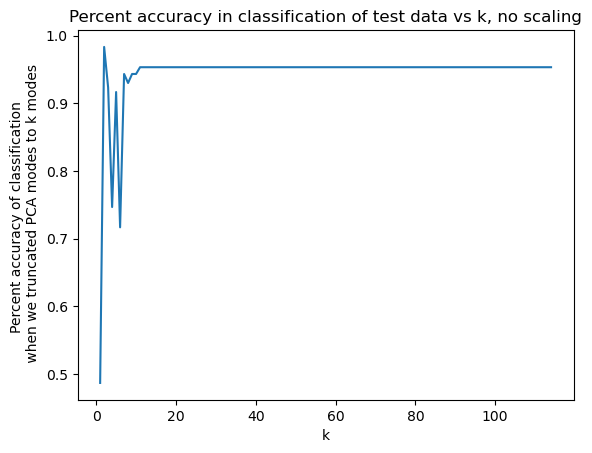

In [39]:
# Plot percent accuracy in classification of test data, new scaling, vs k:

plt.plot(np.arange(1,115), accuracy_k_testrange_2)
plt.xlabel('k')
plt.ylabel('Percent accuracy of classification \n when we truncated PCA modes to k modes')
plt.title('Percent accuracy in classification of test data vs k, no scaling')
plt.savefig("AMATH482_HW2_fig7.png")

Task 6:

In [40]:
# I will implement an alternative classifier based on k-PCA space using logistic regression.

from sklearn.linear_model import LogisticRegression

def trained_labels_logres(labels_train, labels_test, data_train, data_test, k):
    
    log_regression = LogisticRegression(max_iter = 300)

    # truncate PCA modes to k modes, and project into k-modes PCA space, for both train and test data.
    Xk = PCA_k(data_train, k)
    Xk_test = PCA_k_test(data_train, data_test, k)

    log_regression.fit(Xk, labels_train)    # fit to train data, with known labels

    trained_labels = log_regression.predict(Xk_test)    # predict labels for test data

    accuracy_k = accuracy_score(labels_test, trained_labels)    # percent accuracy in classification

    return accuracy_k, trained_labels

In [41]:
# I will find the accuracy of the logistic regression label classification system on the test data for each possible k:

accuracy_k_testrange_logres = np.zeros(114)

for j in range(1, 115):
    accuracy, labels = trained_labels_logres(ground_truth_labels, ground_truth_labels_test, X_train_centered, X_test_centered, j)
    accuracy_k_testrange_logres[j-1] = accuracy

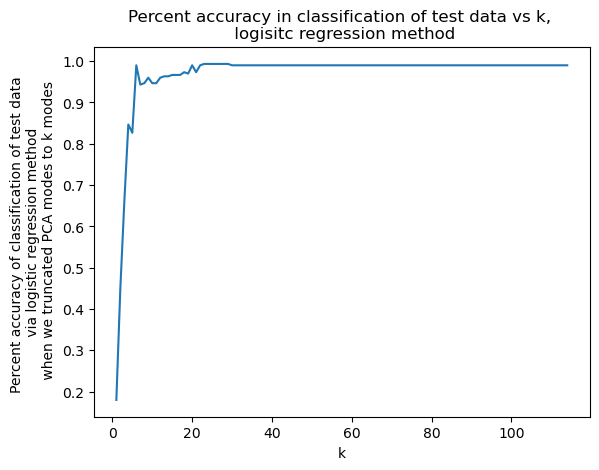

In [42]:
# Plot percent accuracy in classification of test data via logistic regression vs k:

plt.plot(np.arange(1,115), accuracy_k_testrange_logres)
plt.xlabel('k')
plt.ylabel('Percent accuracy of classification of test data \n via logistic regression method \n when we truncated PCA modes to k modes')
plt.title('Percent accuracy in classification of test data vs k, \n logisitc regression method')
plt.savefig("AMATH482_HW2_fig8.png")

In [43]:
# I will find the accuracy of the logistic regression label classification system on the train data for each possible k:
# (like task 4 but with logistic regression method)

accuracy_k_trainrange_logres = np.zeros(114)

for j in range(1, 115):
    accuracy, labels = trained_labels_logres(ground_truth_labels, ground_truth_labels, X_train_centered, X_train_centered, j)
    accuracy_k_trainrange_logres[j-1] = accuracy

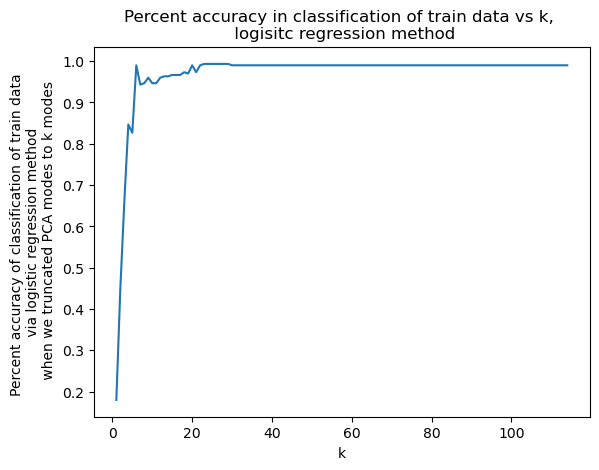

In [54]:
# Plot percent accuracy in classification of train data via logistic regression vs k:

plt.plot(np.arange(1,115), accuracy_k_testrange_logres)
plt.xlabel('k')
plt.ylabel('Percent accuracy of classification of train data \n via logistic regression method \n when we truncated PCA modes to k modes')
plt.title('Percent accuracy in classification of train data vs k, \n logisitc regression method')
plt.savefig("AMATH482_HW2_fig9.png")